In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB


In [9]:
salarydata_train = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\SalaryData_Train.csv.crdownload")
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
salarydata_test= pd.read_csv("C:\\Users\\Lenovo\\Downloads\\SalaryData_Test.csv")
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


EXPLORATARY DATA ANALYSIS

In [11]:
salarydata_train.shape

(15591, 14)

In [12]:
salarydata_test.shape

(15060, 14)

In [13]:
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
# preview the Test dataset

salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


VIEW SUMMARY OF DATASET

In [16]:
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15591 entries, 0 to 15590
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15591 non-null  int64 
 1   workclass      15591 non-null  object
 2   education      15591 non-null  object
 3   educationno    15591 non-null  int64 
 4   maritalstatus  15591 non-null  object
 5   occupation     15591 non-null  object
 6   relationship   15591 non-null  object
 7   race           15591 non-null  object
 8   sex            15591 non-null  object
 9   capitalgain    15591 non-null  int64 
 10  capitalloss    15591 non-null  int64 
 11  hoursperweek   15591 non-null  int64 
 12  native         15591 non-null  object
 13  Salary         15590 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.7+ MB


In [17]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15591.000000,15591.000000,15591.000000,15591.00000,15591.000000
mean,38.433391,10.133795,1067.486563,88.80694,40.925213
std,13.129372,2.534140,7329.395598,403.32023,11.891283
min,17.000000,1.000000,0.000000,0.00000,1.000000
25%,28.000000,9.000000,0.000000,0.00000,40.000000
50%,37.000000,10.000000,0.000000,0.00000,40.000000
75%,47.000000,13.000000,0.000000,0.00000,45.000000
max,90.000000,16.000000,99999.000000,4356.00000,99.000000


In [18]:
salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [19]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [20]:
#Finding the special characters in the data frame 
salarydata_train.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
#Finding the special characters in the data frame 
salarydata_test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
print(salarydata_train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

EXPLORE CATEGORICAL VARIABLES

In [24]:
categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [25]:
# view categorical variables

salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


EXPLORE PROBLEMS WITH CATEGORICAL VARIABLES

In [26]:
# check missing values in categorical variables
salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           1
dtype: int64

In [27]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(salarydata_train[var].value_counts())

 Private             11514
 Self-emp-not-inc     1309
 Local-gov            1038
 State-gov             681
 Self-emp-inc          554
 Federal-gov           490
 Without-pay             5
Name: workclass, dtype: int64
 HS-grad         5158
 Some-college    3439
 Bachelors       2642
 Masters          853
 Assoc-voc        659
 11th             537
 Assoc-acdm       502
 10th             423
 7th-8th          286
 Prof-school      269
 9th              229
 Doctorate        192
 12th             167
 5th-6th          143
 1st-4th           73
 Preschool         19
Name: education, dtype: int64
 Married-civ-spouse       7255
 Never-married            5043
 Divorced                 2181
 Separated                 483
 Widowed                   425
 Married-spouse-absent     193
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64
 Prof-specialty       2088
 Craft-repair         2053
 Exec-managerial      2032
 Adm-clerical         2012
 Sales                1884
 Other-servic

In [28]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(salarydata_train[var].value_counts()/np.float(len(salarydata_train)))

 Private             0.738503
 Self-emp-not-inc    0.083959
 Local-gov           0.066577
 State-gov           0.043679
 Self-emp-inc        0.035533
 Federal-gov         0.031428
 Without-pay         0.000321
Name: workclass, dtype: float64
 HS-grad         0.330832
 Some-college    0.220576
 Bachelors       0.169457
 Masters         0.054711
 Assoc-voc       0.042268
 11th            0.034443
 Assoc-acdm      0.032198
 10th            0.027131
 7th-8th         0.018344
 Prof-school     0.017254
 9th             0.014688
 Doctorate       0.012315
 12th            0.010711
 5th-6th         0.009172
 1st-4th         0.004682
 Preschool       0.001219
Name: education, dtype: float64
 Married-civ-spouse       0.465333
 Never-married            0.323456
 Divorced                 0.139888
 Separated                0.030979
 Widowed                  0.027259
 Married-spouse-absent    0.012379
 Married-AF-spouse        0.000706
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13392

In [29]:
# check labels in workclass variable

salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [30]:
# check frequency distribution of values in workclass variable

salarydata_train.workclass.value_counts()

 Private             11514
 Self-emp-not-inc     1309
 Local-gov            1038
 State-gov             681
 Self-emp-inc          554
 Federal-gov           490
 Without-pay             5
Name: workclass, dtype: int64

Explore occupation variable

In [31]:
# check labels in occupation variable

salarydata_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [32]:
# check frequency distribution of values in occupation variable

salarydata_train.occupation.value_counts()

 Prof-specialty       2088
 Craft-repair         2053
 Exec-managerial      2032
 Adm-clerical         2012
 Sales                1884
 Other-service        1676
 Machine-op-inspct    1032
 Transport-moving      821
 Handlers-cleaners     652
 Farming-fishing       481
 Tech-support          446
 Protective-serv       332
 Priv-house-serv        78
 Armed-Forces            4
Name: occupation, dtype: int64

Explore native_country variable

In [33]:
# check labels in native_country variable

salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [34]:
# check frequency distribution of values in native_country variable

salarydata_train.native.value_counts()

 United-States                 14204
 Mexico                          308
 Philippines                      97
 Germany                          70
 Puerto-Rico                      66
 Canada                           60
 England                          52
 Cuba                             47
 El-Salvador                      46
 India                            46
 Jamaica                          45
 China                            40
 South                            39
 Guatemala                        37
 Poland                           35
 Dominican-Republic               34
 Italy                            34
 Vietnam                          33
 Japan                            31
 Iran                             27
 Columbia                         26
 Haiti                            24
 Taiwan                           22
 Greece                           19
 Portugal                         18
 Peru                             15
 Nicaragua                        15
 

Number of labels: cardinality

In [35]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(salarydata_train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  40  labels
Salary  contains  3  labels


Explore Numerical Variables

In [36]:
# find numerical variables

numerical = [var for var in salarydata_train.columns if salarydata_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [37]:
# view the numerical variables

salarydata_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


Explore problems within numerical variables

In [38]:
# check missing values in numerical variables

salarydata_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

Declare feature vector and target variable

In [39]:
X = salarydata_train.drop(['Salary'], axis=1)

y = salarydata_train['Salary']

Split data into separate training and test set

In [40]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [41]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10913, 13), (4678, 13))

Feature Engineering

In [43]:
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [44]:
X_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [45]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical


['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [46]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [47]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [48]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [49]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)  

In [50]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [51]:
# check missing values in X_train

X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [52]:
# check missing values in X_test

X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

Encode categorical variables

In [53]:
# print categorical variables

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [54]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
1738,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
15394,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
12664,Private,Bachelors,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States
12255,Private,11th,Never-married,Machine-op-inspct,Not-in-family,White,Female,United-States
14096,Self-emp-not-inc,HS-grad,Never-married,Other-service,Not-in-family,White,Male,United-States


In [55]:
!pip install category_encoders

In [56]:
import category_encoders as ce

In [57]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [58]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
1738,68,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15394,32,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12664,57,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12255,19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14096,25,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_train.shape

(10913, 102)

In [61]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
4663,33,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12817,45,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7141,49,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14462,36,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13178,40,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
X_test.shape

(4678, 102)

Feature Scaling

In [63]:
cols = X_train.columns

In [64]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [65]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [66]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [67]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
0,1.631579,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.263158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.947368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.631579,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Model training

In [68]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

Predict the results

In [69]:
y_pred = gnb.predict(X_test)

y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

Check accuracy score

Compare the train-set and test-set accuracy

In [72]:

y_pred_train = gnb.predict(X_train)


y_pred_train

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [75]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7946


Check for overfitting and underfitting

In [76]:
# check class distribution in test set

y_test.value_counts()

 <=50K    3557
 >50K     1120
Name: Salary, dtype: int64

In [77]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


Confusion matrix

In [93]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[3.87101586e-01, 6.12898414e-01],
       [9.98690616e-01, 1.30938373e-03],
       [9.99990710e-01, 9.29019168e-06],
       [9.62379825e-01, 3.76201752e-02],
       [1.11427563e-04, 9.99888572e-01],
       [6.57426242e-10, 9.99999999e-01],
       [1.15107977e-42, 1.00000000e+00],
       [9.57064912e-01, 4.29350879e-02],
       [9.99958718e-01, 4.12816349e-05],
       [9.99995989e-01, 4.01068660e-06]])

In [94]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,3.871016e-01,0.612898
1,9.986906e-01,0.001309
2,9.999907e-01,0.000009
3,9.623798e-01,0.037620
4,1.114276e-04,0.999889
5,6.574262e-10,1.000000
6,1.151080e-42,1.000000
7,9.570649e-01,0.042935
8,9.999587e-01,0.000041
9,9.999960e-01,0.000004


In [95]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([6.12898414e-01, 1.30938373e-03, 9.29019168e-06, 3.76201752e-02,
       9.99888572e-01, 9.99999999e-01, 1.00000000e+00, 4.29350879e-02,
       4.12816349e-05, 4.01068660e-06])

In [96]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

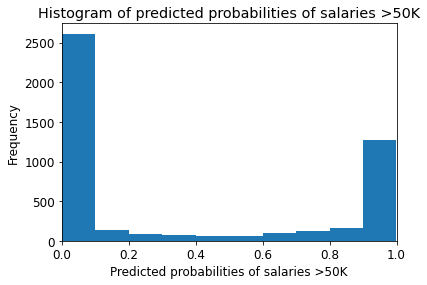

In [97]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [100]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8912


In [101]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79578755 0.79212454 0.79120879 0.80568286 0.79835014 0.78643446
 0.80659945 0.77635197 0.78735105 0.80843263]


In [102]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7948
